In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("smoking.csv")
df.replace("NA", np.nan, inplace=True)


In [3]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [5]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


In [6]:
print(df.isnull().sum())

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64


In [7]:
df=df.copy()
df['amt_weekends']=df['amt_weekends'].fillna(0).astype(int)
df['amt_weekdays']=df['amt_weekdays'].fillna(0).astype(int)
df.drop(columns=['type'], inplace=True)
df = df.rename(columns={'Unnamed: 0': 'ids'})


In [8]:
df['gross_income'].value_counts()


5,200 to 10,400     396
10,400 to 15,600    268
2,600 to 5,200      257
15,600 to 20,800    188
20,800 to 28,600    155
Under 2,600         133
Refused             108
Above 36,400         89
28,600 to 36,400     79
Unknown              18
Name: gross_income, dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


In [10]:
print('Dimensões do dataframe:', df.shape)
print('Quantidade de valores faltantes:', df.isna().sum().sum())

Dimensões do dataframe: (1691, 12)
Quantidade de valores faltantes: 0


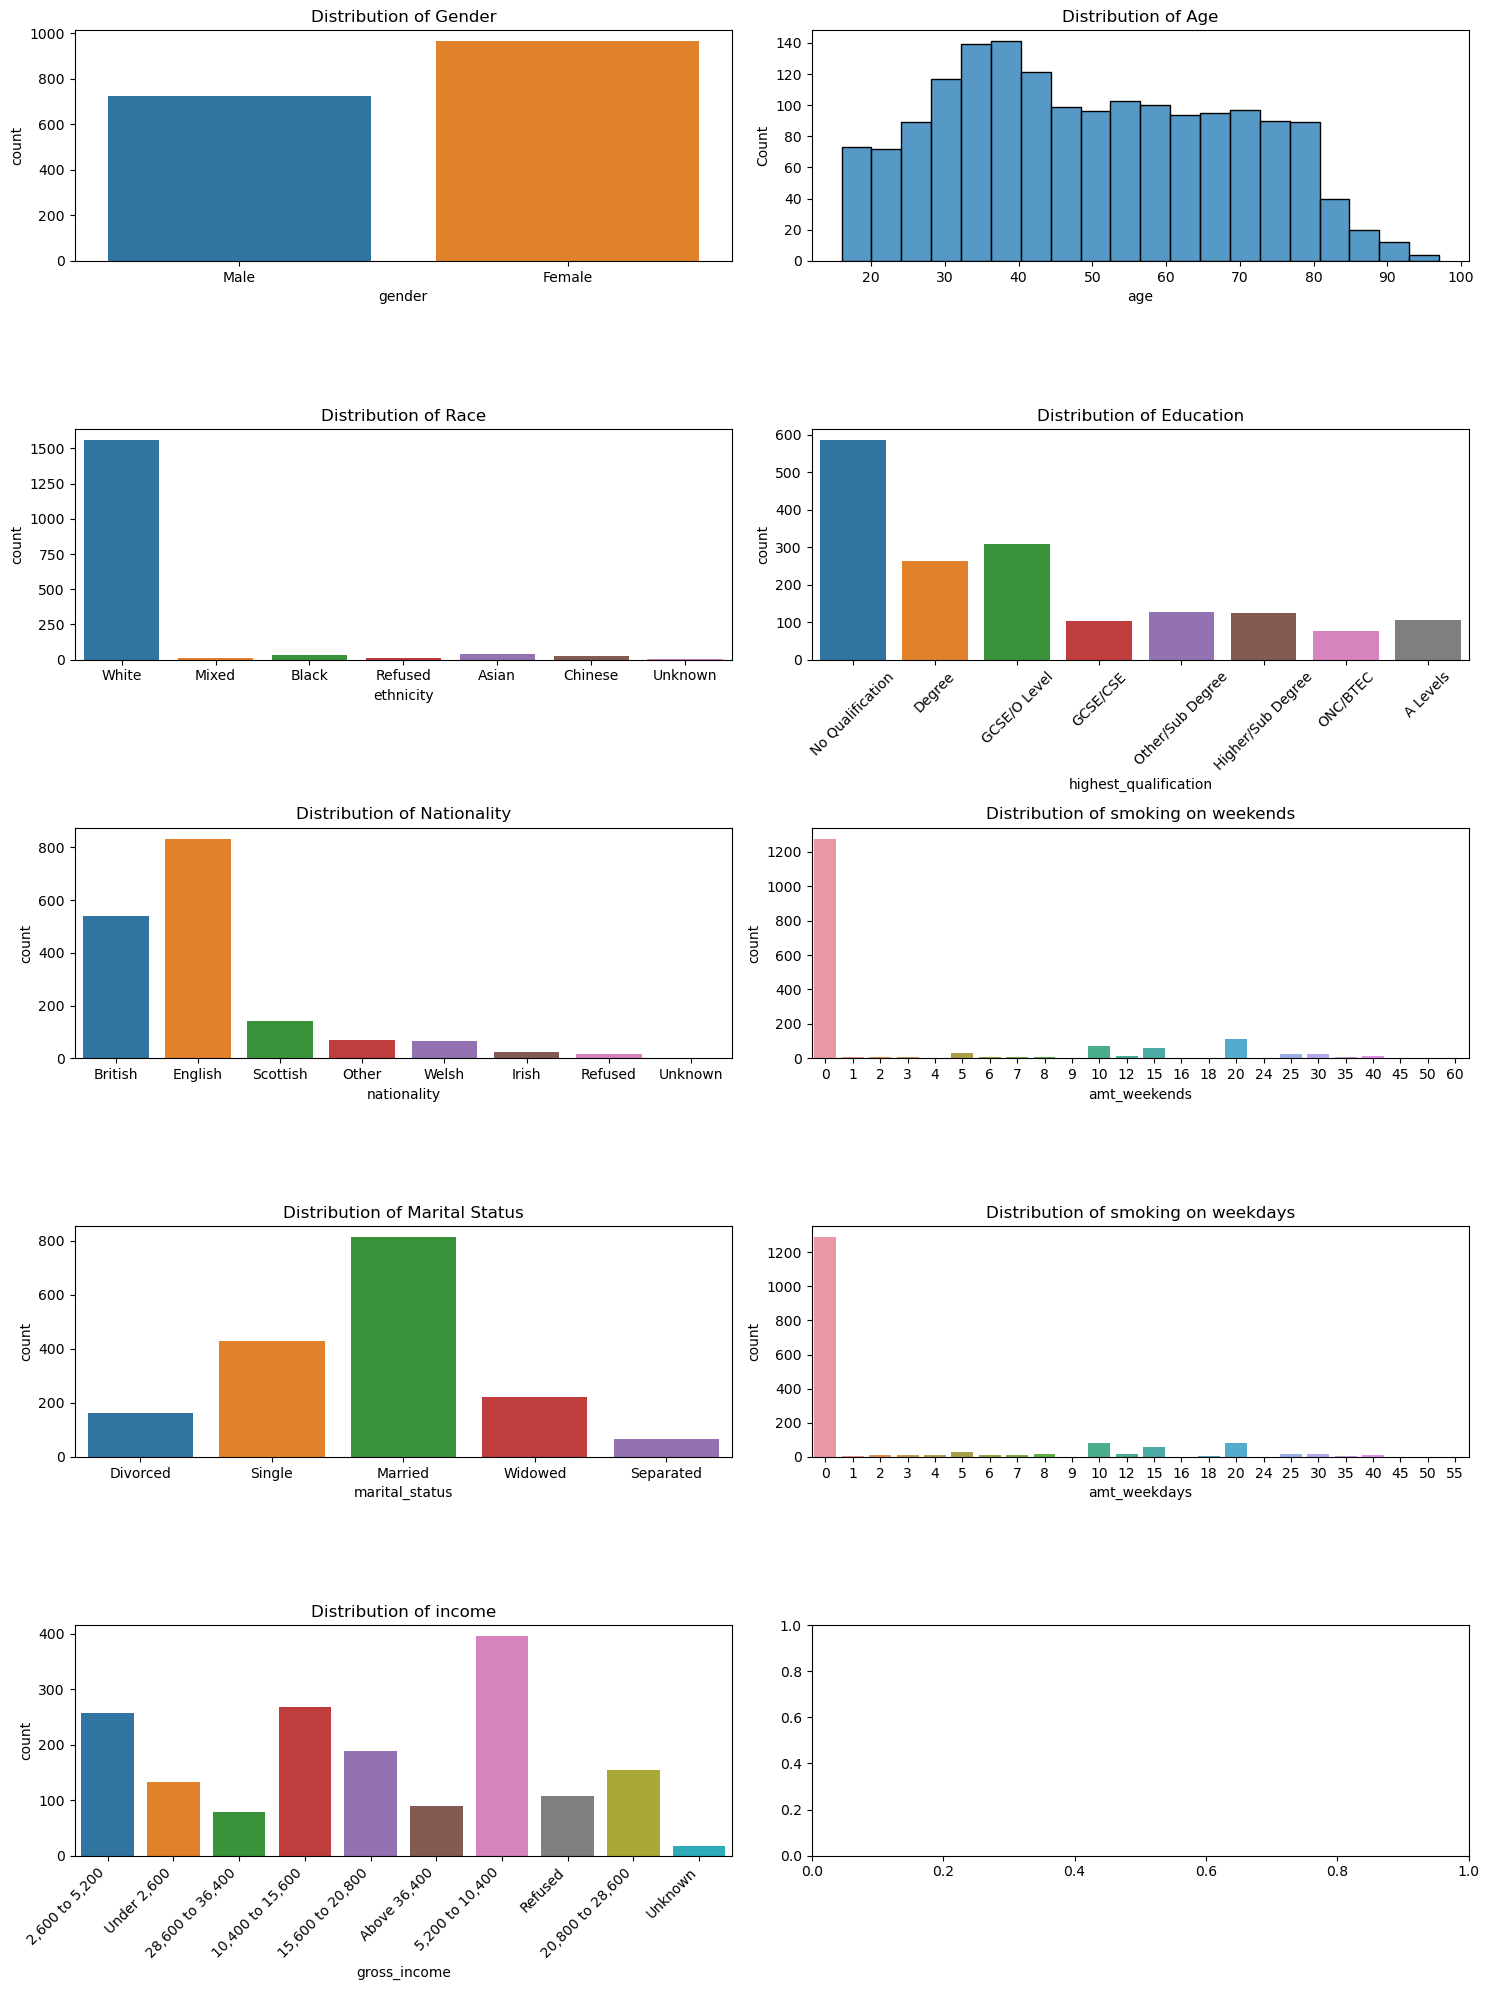

In [27]:
data= df
fig, axs = plt.subplots(5, 2, figsize=(15,20)) # Criamos uma grade de 4 linhas e 2 colunas de subplots

# Distribuição de gênero
sns.countplot(data=data, x='gender', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Gender')

# Distribuição de idade
sns.histplot(data=data, x='age', bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Age')

# Distribuição de raça
sns.countplot(data=data, x='ethnicity', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Race')

# Distribuição de educação
sns.countplot(data=data, x='highest_qualification', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Education')
axs[1, 1].tick_params(axis='x', rotation=45)

# Distribuição de país
sns.countplot(data=data, x='nationality', ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Nationality')

# Distribuição de dependência de nicotina
sns.countplot(data=data, x='amt_weekends', ax=axs[2, 1])
axs[2, 1].set_title('Distribution of smoking on weekends')

# Distribuição do estado civil
sns.countplot(data=data, x='marital_status', ax=axs[3, 0])
axs[3, 0].set_title('Distribution of Marital Status')

# Distribuição de dependência de nicotina
sns.countplot(data=data, x='amt_weekdays', ax=axs[3, 1])
axs[3, 1].set_title('Distribution of smoking on weekdays')

# Distribution of income
sns.countplot(data=data,x='gross_income', ax=axs[4, 0])
axs[4, 0].set_title('Distribution of income')
axs[4, 0].set_xticklabels(axs[4, 0].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



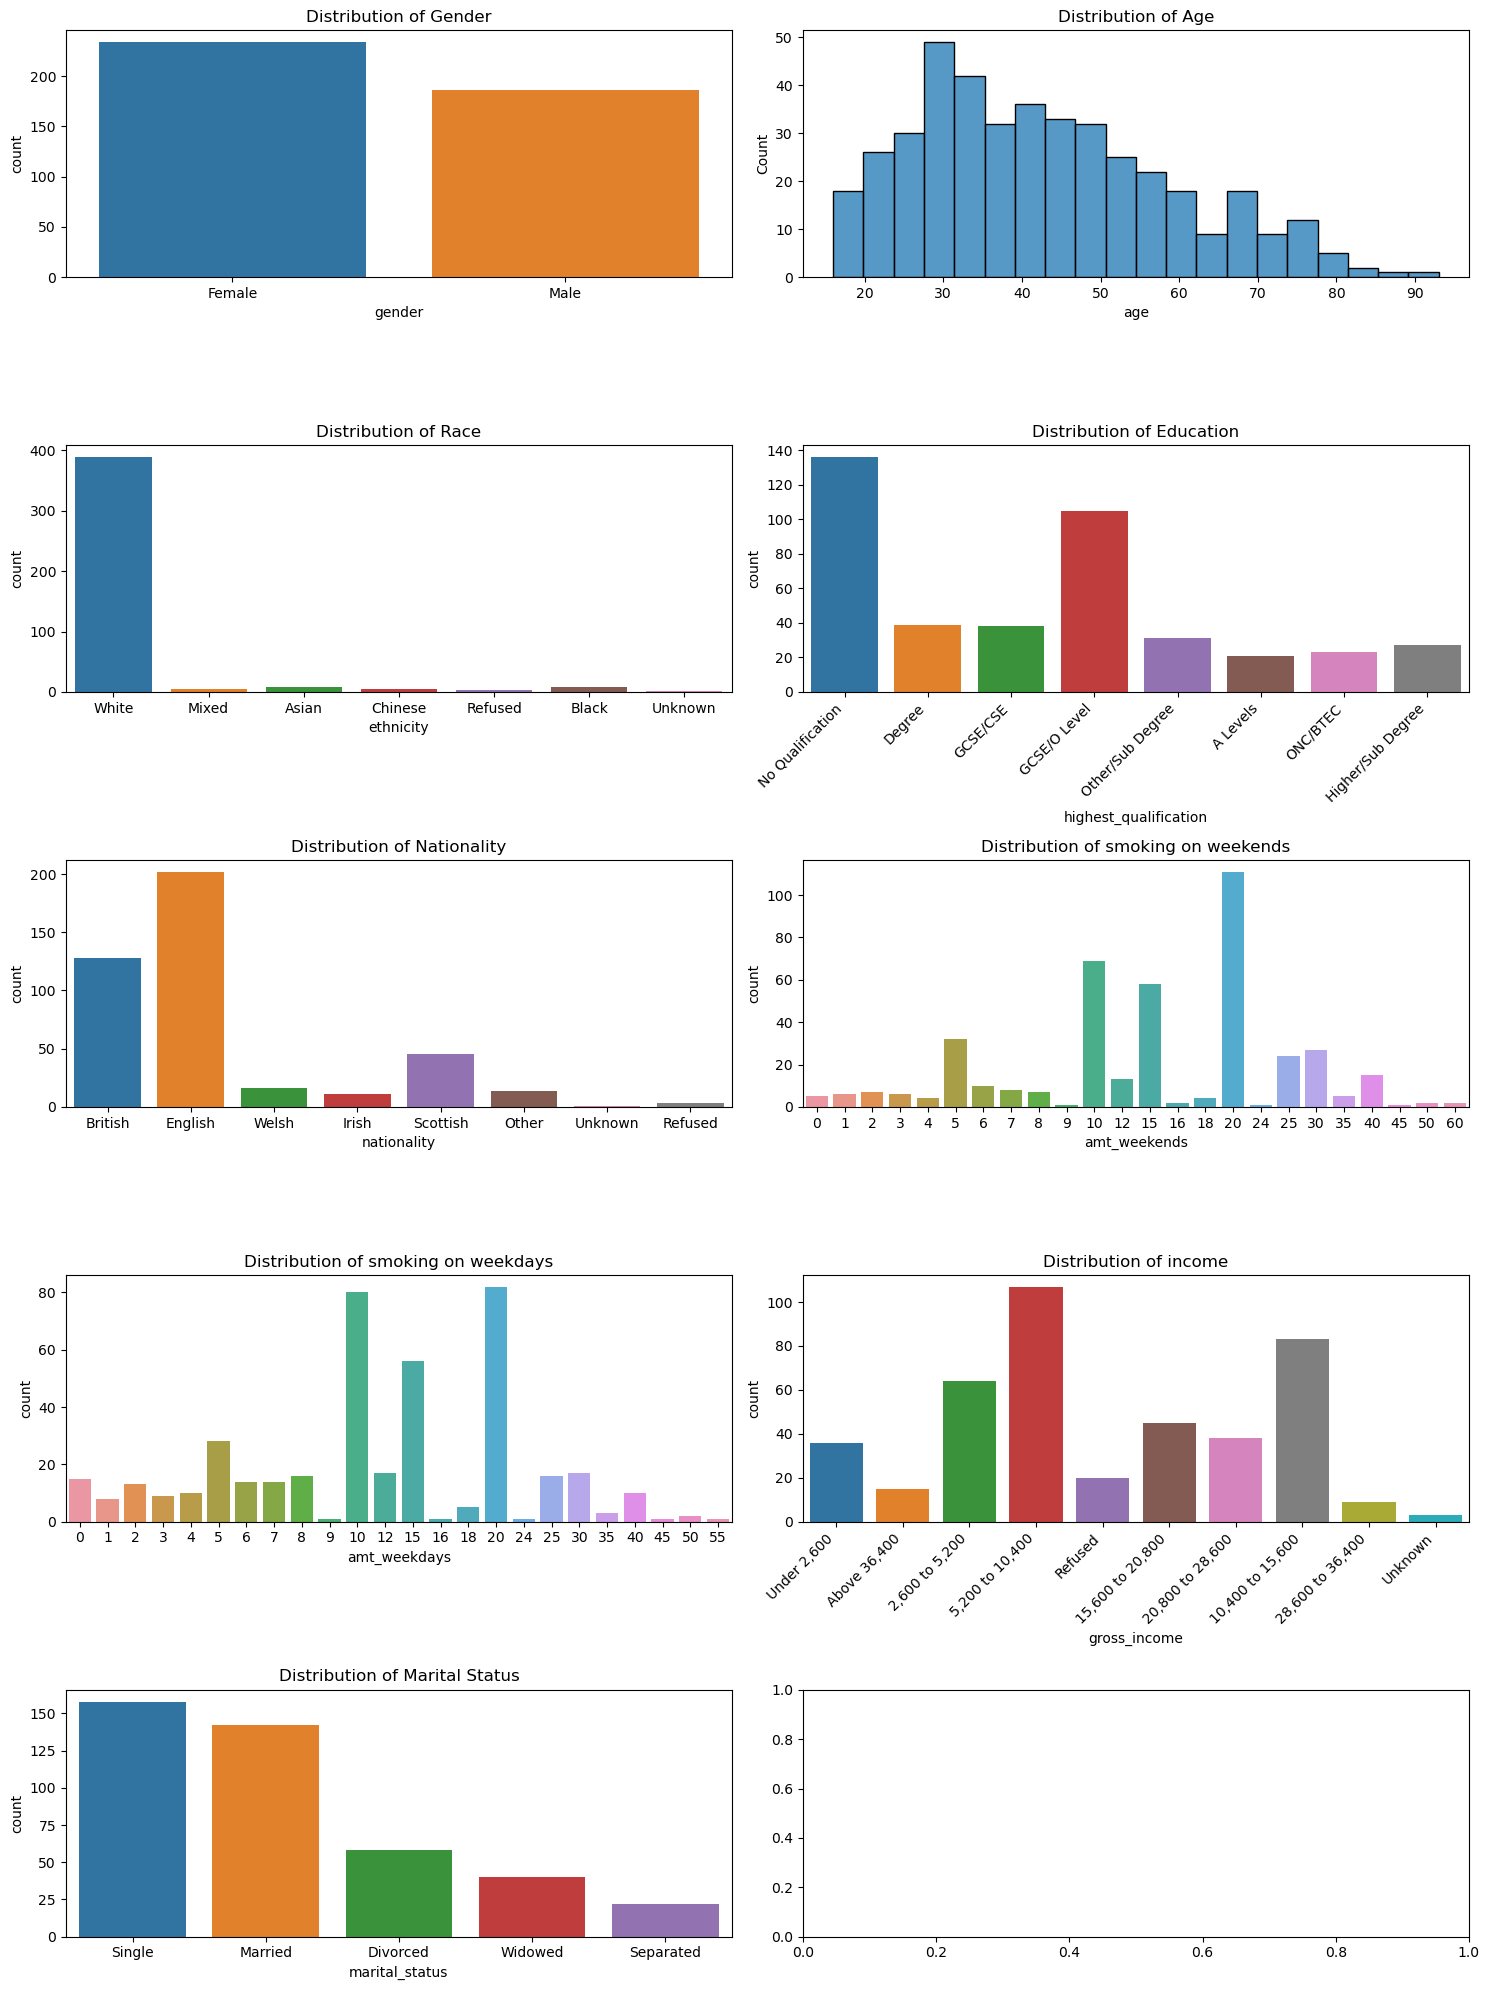

In [12]:
only_smokers = df[(df['amt_weekdays'] > 0) | (df['amt_weekends'] > 0)]
data = only_smokers

fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Distribution of gender
sns.countplot(data=data, x='gender', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Gender')

# Distribution of age
sns.histplot(data=data, x='age', bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Age')

# Distribution of race
sns.countplot(data=data, x='ethnicity', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Race')

# Distribution of education
sns.countplot(data=data, x='highest_qualification', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Education')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')

# Distribution of country
sns.countplot(data=data, x='nationality', ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Nationality')

# Distribution of nicotine dependence
sns.countplot(data=data, x='amt_weekends', ax=axs[2, 1])
axs[2, 1].set_title('Distribution of smoking on weekends')

# Distribution of smoking status
sns.countplot(data=data, x='amt_weekdays', ax=axs[3, 0])
axs[3, 0].set_title('Distribution of smoking on weekdays')

# Distribution of income
sns.countplot(data=data,x='gross_income', ax=axs[3, 1])
axs[3, 1].set_title('Distribution of income')
axs[3, 1].set_xticklabels(axs[3, 1].get_xticklabels(), rotation=45, ha='right')

# Distribuição do estado civil
sns.countplot(data=data, x='marital_status', ax=axs[4, 0])
axs[4, 0].set_title('Distribution of Marital Status')

# Add spacing
fig.tight_layout()

plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


In [14]:
porcentage= (only_smokers.shape[0]/df.shape[0])*100
print(f"{porcentage:.2f}% do dataset é composto por fumantes")

24.84% do dataset é composto por fumantes


In [15]:
# Split the data

X = df.drop(columns=["smoke",'amt_weekdays','amt_weekends','ids'])
X = pd.get_dummies(X)
y = df["smoke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


## 4. Aprendizado de Máquina
Um modelo de Regressão Logística é treinado no conjunto de dados e são feitas previsões no conjunto de testes. O desempenho do modelo é avaliado por meio de um relatório de classificação e uma pontuação de precisão. A importância dos recursos (coeficientes) do modelo também é impressa.

Um gráfico de histograma da distribuição dos coeficientes dos recursos é criado, mostrando a importância relativa dos diferentes recursos para a previsão do modelo.

In [17]:
model = LogisticRegression(penalty='l1',C=0.1, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [18]:
print(classification_report(y_test, predictions))

print("Accuracy:", score*100,"%")

              precision    recall  f1-score   support

          No       0.76      1.00      0.86       258
         Yes       0.00      0.00      0.00        81

    accuracy                           0.76       339
   macro avg       0.38      0.50      0.43       339
weighted avg       0.58      0.76      0.66       339

Accuracy: 76.10619469026548 %


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
importance = model.coef_[0]

# Print the feature importance scores
for i,v in enumerate(importance):
    if v != 0:
        print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.02113
Feature: 2, Score: 0.09115
Feature: 3, Score: 0.12185
Feature: 4, Score: -0.43257
Feature: 9, Score: -0.46689
Feature: 30, Score: 0.03500
Feature: 31, Score: 0.14491
Feature: 36, Score: 0.10204
Feature: 43, Score: 0.11594


In [20]:


n = int(1e3)

num_features = X_train.shape[1]
dic_test = {i: [] for i in range(num_features)}

for _ in range(n):
    # mexer no C pra ver conclusoes
    model = LogisticRegression(penalty='l1', C=1e6, solver='liblinear')
    model.fit(X_train, y_train)
    importance = model.coef_[0]
    
    for e, v in enumerate(importance):
        dic_test[e].append(v)  




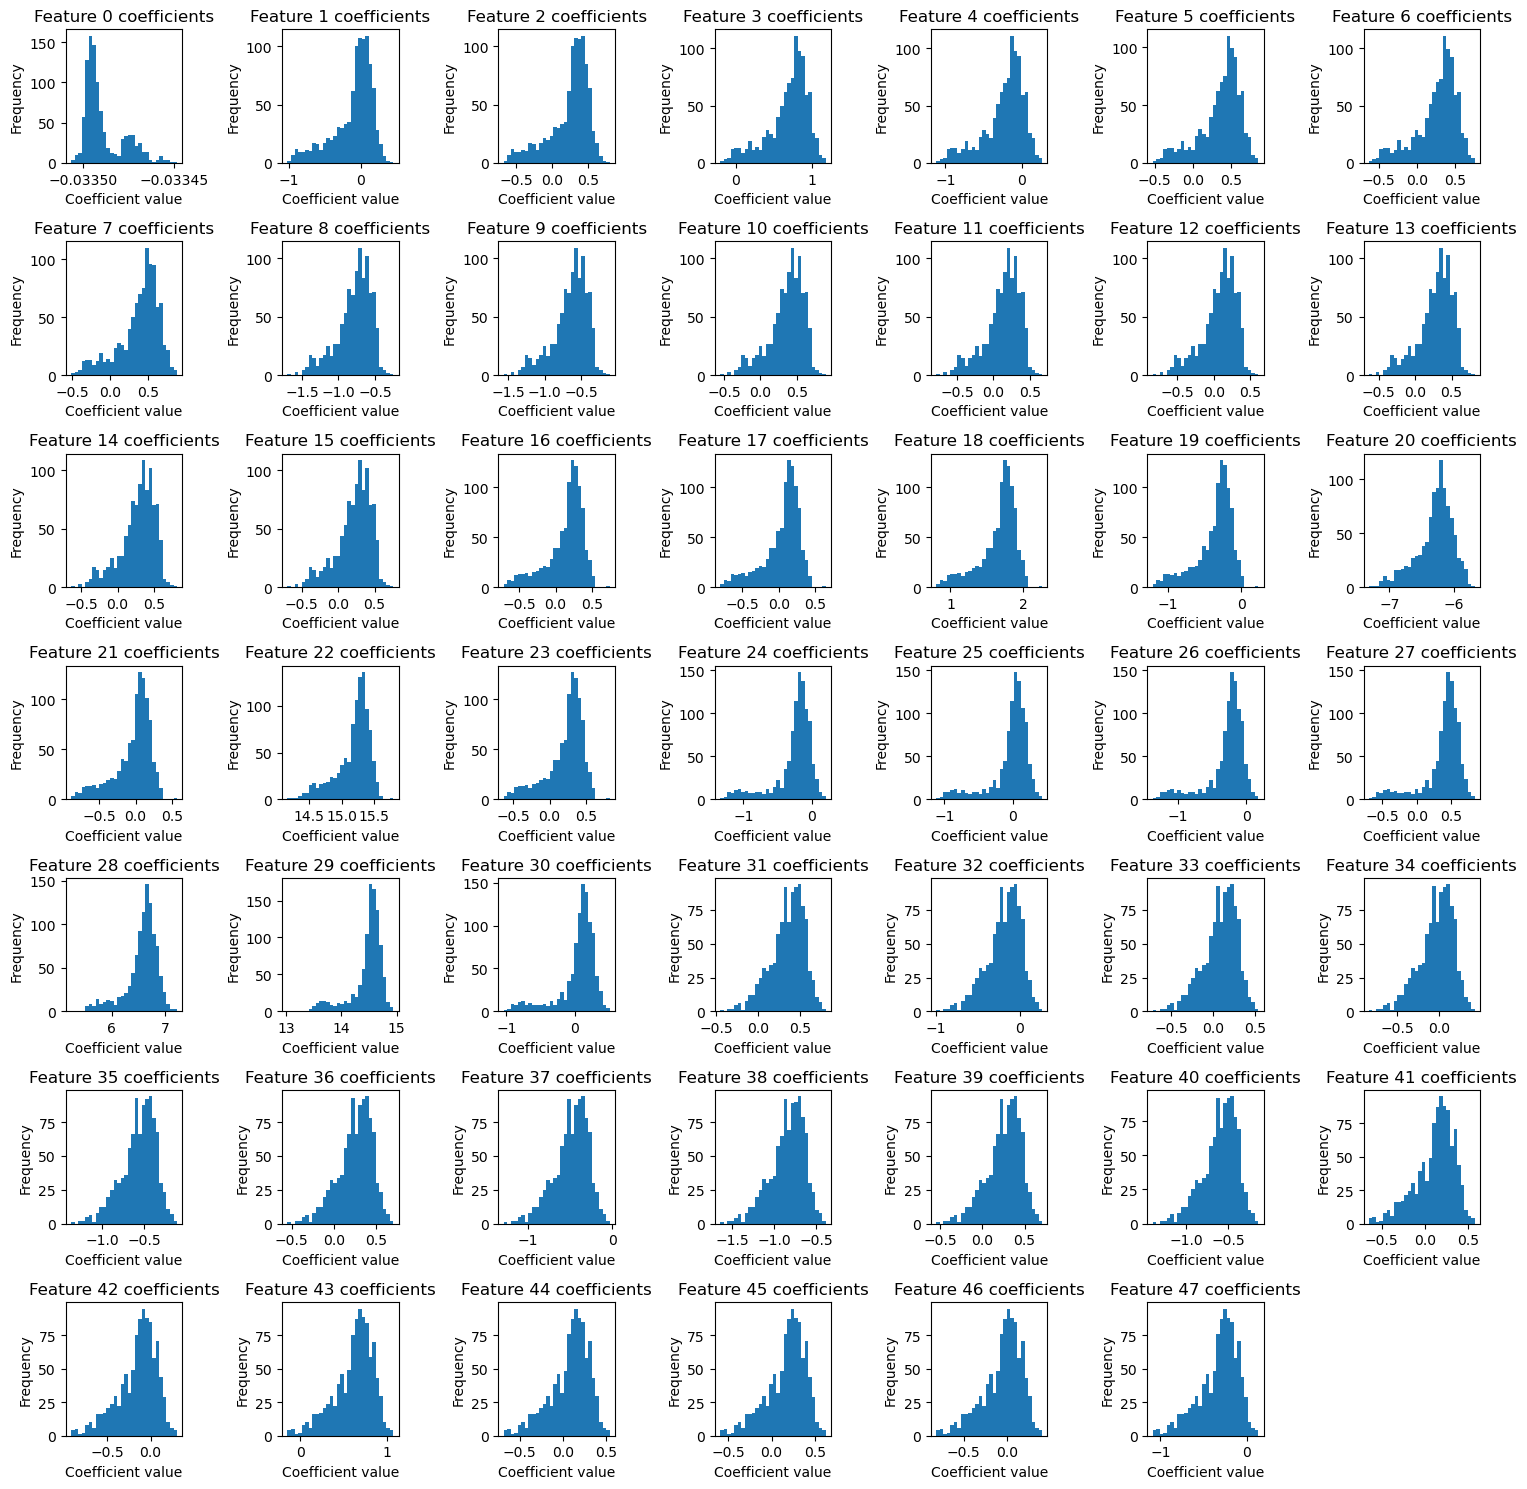

In [21]:
import math

num_features = len(dic_test)
sqrt_features = math.ceil(math.sqrt(num_features)) # To maintain a square-like configuration

fig, axs = plt.subplots(sqrt_features, sqrt_features, figsize=(15, 15))

# Flat the axes for easy iteration
axs_flat = axs.flatten()

for idx, (feature, coefficients) in enumerate(dic_test.items()):
    ax = axs_flat[idx]
    ax.hist(coefficients, bins=30)
    ax.set_title(f"Feature {feature} coefficients")
    ax.set_xlabel("Coefficient value")
    ax.set_ylabel("Frequency")

# Remove the unused subplots
for i in range(idx+1, len(axs_flat)):
    fig.delaxes(axs_flat[i])

fig.tight_layout()
plt.show()


In [22]:

model = LogisticRegression(penalty='l1',C=0.1, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [23]:

print(classification_report(y_test, predictions))

print("Accuracy:", score*100,"%")

              precision    recall  f1-score   support

          No       0.76      1.00      0.86       258
         Yes       0.00      0.00      0.00        81

    accuracy                           0.76       339
   macro avg       0.38      0.50      0.43       339
weighted avg       0.58      0.76      0.66       339

Accuracy: 76.10619469026548 %


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Get the feature importance (coefficients) of the model
importance = model.coef_[0]

# Print the feature importance scores
for i,v in enumerate(importance):
    if v != 0.00:
        print('Feature: %0d, Score: %.5f' % (i,v))



Feature: 0, Score: -0.02120
Feature: 2, Score: 0.09077
Feature: 3, Score: 0.12048
Feature: 4, Score: -0.43357
Feature: 9, Score: -0.46751
Feature: 30, Score: 0.04038
Feature: 31, Score: 0.14416
Feature: 36, Score: 0.10165
Feature: 43, Score: 0.11507


In [28]:
colunas=[0,2,3,4,9,30,31,36,43]

print("Features importantes: ")

for index, feat in enumerate(X.columns):
    if index in colunas:
        print(feat)



Features importantes: 
age
gender_Male
marital_status_Divorced
marital_status_Married
highest_qualification_Degree
ethnicity_White
gross_income_10,400 to 15,600
gross_income_5,200 to 10,400
region_Scotland
